# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** K

**Names:**

* Xavier Jeanmonod
* Adrian Baudat
* Simon Wicky

---

#### Instructions

*This is a template for part 3 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.3 Epdemics

#### Exercise 2.9: Simulate an epidemic outbreak

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import json

with open("../data/nyc_augmented_network.json", 'r') as file:
    dict_network = json.load(file)
    
G = nx.Graph()
for node in dict_network["nodes"]:
    G.add_node(node["id"], id=node["id"], coordinates=node["coordinates"])
    
for edge in dict_network["links"]:
    G.add_edge(edge["source"], edge["target"])
#Starting from here, the graph is ready


In [2]:
import epidemics_helper
MAX_DAYS = 100
sir = epidemics_helper.SimulationSIR(G, beta=10.0, gamma=0.1)
sir.launch_epidemic(source=23654, max_time=MAX_DAYS)

Epidemic stopped after 101.88 days | 101.88 days elapsed | 0.1% susceptible, 0.0% infected, 99.9% recovered


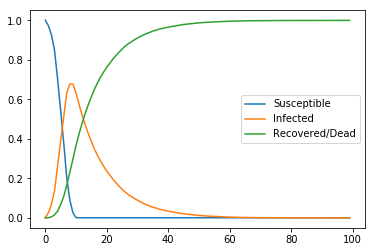

First day where 60%+ of the population is infected : 7
First day where 60%+ of the population is dead : 15


In [9]:
list_susceptible = []
list_infected = []
list_recovered = []


for t in range(0,MAX_DAYS):
    cur_susceptible = []
    cur_recovered = []
    cur_infected = []
    for i in range(len(sir.inf_time)):  
        if sir.inf_time[i] > t:
            cur_susceptible.append(i)
        elif sir.rec_time[i] > t:    
            nb_added += 1
            cur_infected.append(i) 
        else:
            cur_recovered.append(i)
    list_infected.append(cur_infected)
    list_susceptible.append(cur_susceptible)
    list_recovered.append(cur_recovered)
    
    
#The list at index t contain the nodes susceptible/infected/recovered at time t

#Plotting the percentage
nb_susceptible = list(map(lambda x : len(x) / len(G.nodes), list_susceptible))
nb_recovered = list(map(lambda x : len(x) / len(G.nodes), list_recovered))
nb_infected = list(map(lambda x : len(x) / len(G.nodes), list_infected))



plt.plot(nb_susceptible, label="Susceptible")
plt.plot(nb_infected, label="Infected")
plt.plot(nb_recovered, label="Recovered/Dead")
plt.legend()
plt.show()


#Finding the first occurence of a value > 0.6
print("First day where 60%+ of the population is infected : " 
      + str(nb_infected.index(next(i for i in nb_infected if i > 0.6))))
print("First day where 60%+ of the population is dead : " 
      + str(nb_recovered.index(next(i for i in nb_recovered if i > 0.6))))

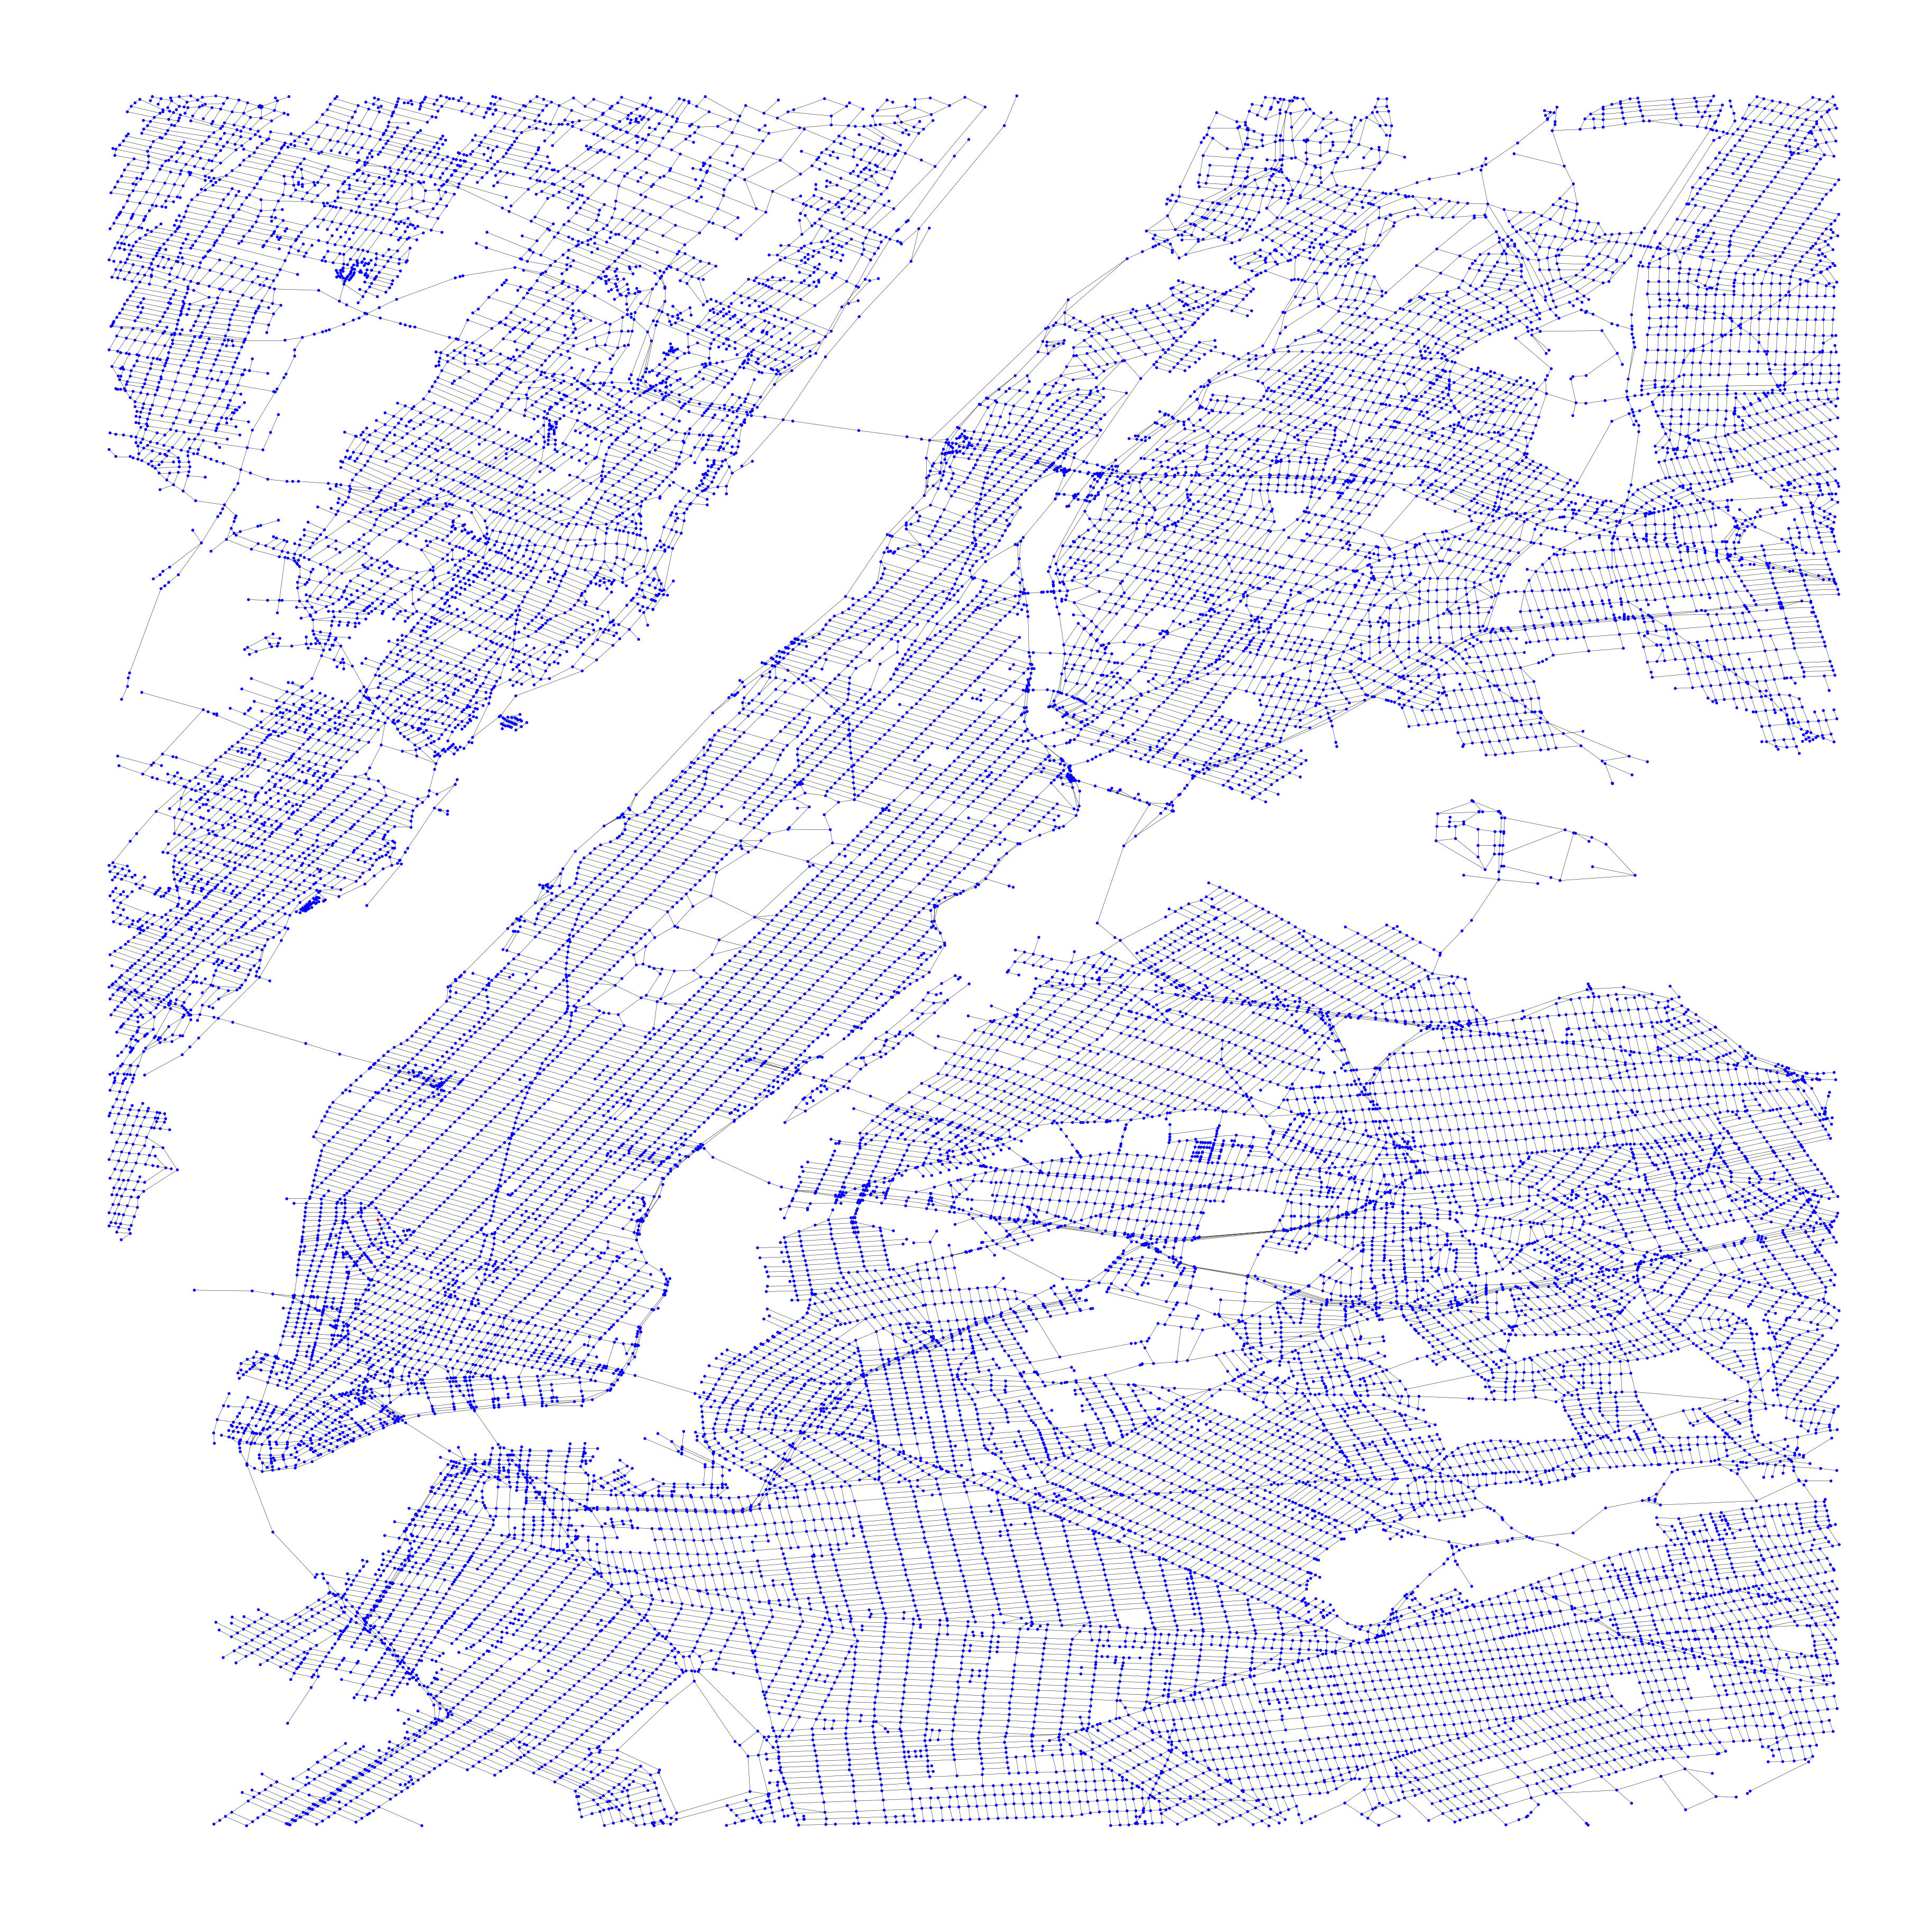

In [19]:
def color(t):
    color = ['green'] * len(G.nodes)
    for node in G.nodes:
        if node in list_infected[t]:
            color[node] = 'red'
        elif node in list_susceptible[t]:
            color[node] = 'blue'
    
    return color
pos = {}  
for node in G.nodes(data=True):
    pos[node[0]] = (node[1]["coordinates"][0],node[1]["coordinates"][1])
    
plt.figure(1,figsize=(50,50)) 
nx.draw(G,pos, node_size=20,width=0.5,node_color=color(0))


---

### 2.3.1 Stop the apocalypse!

#### Exercise 2.10: Strategy 1

#### Exercise 2.11: Strategy 2

Explanations :
Our main idea is to separate huge group of nodes that are linked together with only few nodes. Looking at the previous graph, we see that there is 3 "main group" and they're connected 2 by 2 with thin bonds made from nodes with only 2 edges.
To do this, we detect thoses nodes by their degrees and delete the edge coming from an "island" (or going) to another "island" ("islands" are the huge group of nodes)
Here is an example :
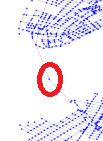

Now, we "just" have to remove edges connected to a similar node as the one in example.